# HUFFLEPUFF WINE ANALYSYS

## SOURCES
- https://archive.ics.uci.edu/dataset/109/wine
- https://archive.ics.uci.edu/dataset/186/wine+quality
- https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data

In [ ]:
#!pip install pycountry


In [359]:
import pandas as pd
import numpy as np
import pycountry
import seaborn as sns
import matplotlib.pyplot as plt

# PLASTIC POLLUTION CLEANING

In [364]:
df=pd.read_csv('sources\plastic-pollution.csv')


In [366]:
df.drop(columns=['Year'],inplace=True)

In [368]:
# Normalize the 'Per capita plastic waste (kg/person/day)' to a scale of 1 to 10
min_waste = df['Per capita plastic waste (kg/person/day)'].min()
max_waste = df['Per capita plastic waste (kg/person/day)'].max()

In [370]:
# Create the score column (values scaled from 1 to 10)
df['Plastic_Pollution_Score'] = ((df['Per capita plastic waste (kg/person/day)'] - min_waste) / (max_waste - min_waste)) * 9 + 1


In [372]:
# Round the scores for cleaner output
df['Plastic_Pollution_Score'] = df['Plastic_Pollution_Score'].round().astype(int)


In [374]:
# Function to get the 3-letter country code
def get_country_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Add a new column with the 3-letter country code
df['Country_code'] = df['Entity'].apply(get_country_code)

C:\Users\Tanguy\AppData\Local\Temp\ipykernel_15716\2020532123.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


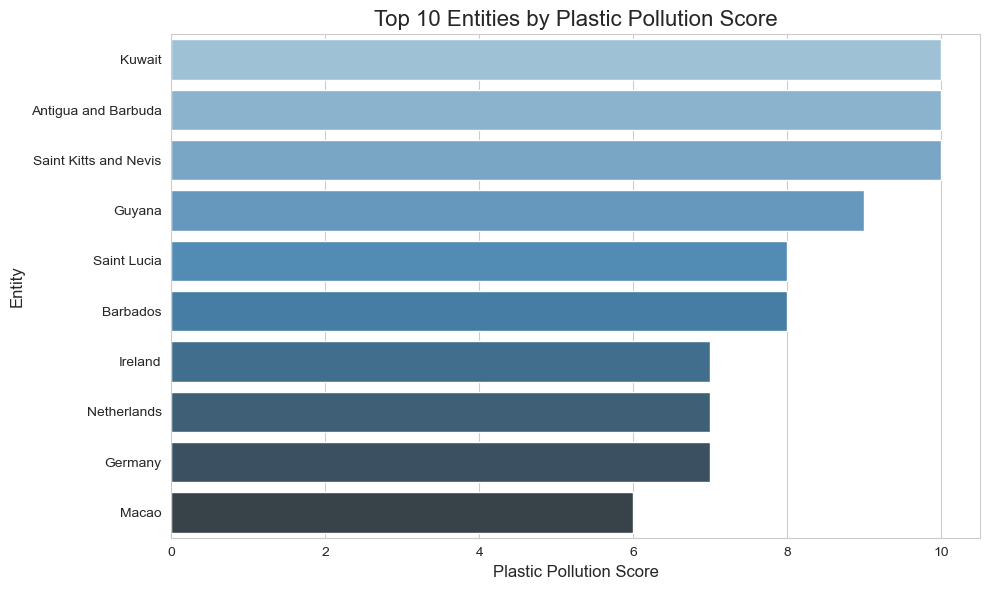

In [376]:

# DataFrame by 'Plastic_Pollution_Score' in descending order
top_ten_score = df[['Entity', 'Plastic_Pollution_Score']].sort_values(by='Plastic_Pollution_Score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10,6))  # Set the figure size
sns.set_style("whitegrid")


sns.barplot(
    x='Plastic_Pollution_Score', y='Entity', data=top_ten_score,
    palette='Blues_d'
)


plt.title('Top 10 Entities by Plastic Pollution Score', fontsize=16)
plt.xlabel('Plastic Pollution Score', fontsize=12)
plt.ylabel('Entity', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\Tanguy\AppData\Local\Temp\ipykernel_15716\1294652843.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


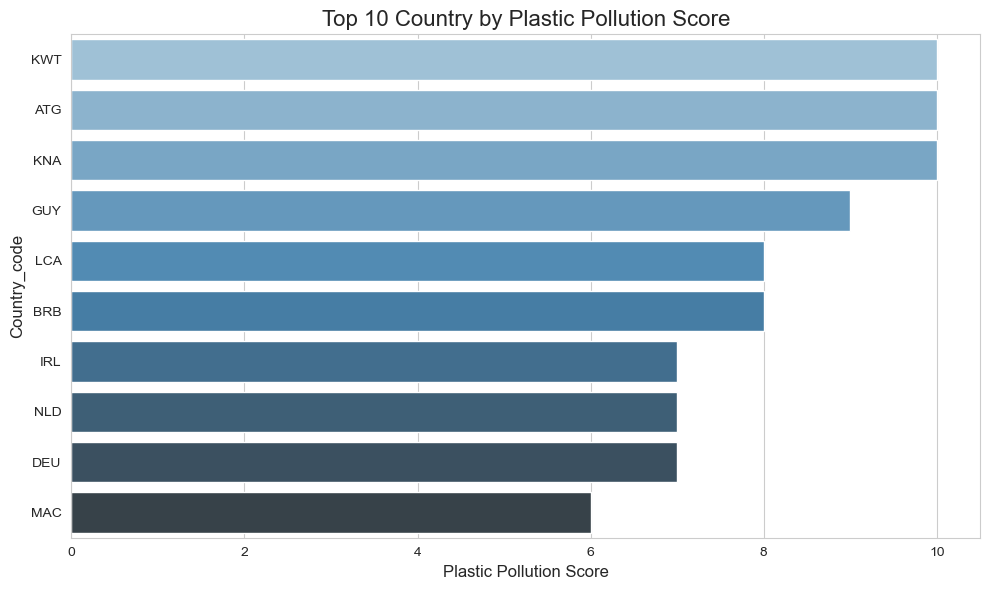

In [378]:
# DataFrame by 'Plastic_Pollution_Score' in descending order by Country Code
top_ten_score = df[['Country_code', 'Plastic_Pollution_Score']].sort_values(by='Plastic_Pollution_Score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10,6))  # Set the figure size
sns.set_style("whitegrid")


sns.barplot(
    x='Plastic_Pollution_Score', y='Country_code', data=top_ten_score,
    palette='Blues_d'
)


plt.title('Top 10 Country by Plastic Pollution Score', fontsize=16)
plt.xlabel('Plastic Pollution Score', fontsize=12)
plt.ylabel('Country_code', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [380]:
df.to_csv('plastic_waste.csv', index=False)